In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Rows

In [2]:
Table(['Even', 'Odd'])

Even,Odd


In [3]:
Table(['Even', 'Odd']).with_row([2, 3])

Even,Odd
2,3


In [4]:
t = Table(['Even', 'Odd']).with_row([2, 3]).with_row([4, 5])
t

Even,Odd
2,3
4,5


In [5]:
t = t.with_row([6, 7])

In [6]:
t

Even,Odd
2,3
4,5
6,7


In [7]:
t = t.with_row([4, 7])
t

Even,Odd
2,3
4,5
6,7
4,7


In [8]:
t.where('Even', 4)

Even,Odd
4,5
4,7


In [9]:
t.where(0, 4)

Even,Odd
4,5
4,7


In [10]:
t.where(1, are.not_above(5))

Even,Odd
2,3
4,5


In [11]:
t

Even,Odd
2,3
4,5
6,7
4,7


In [12]:
help(are)

Help on class are in module datascience.predicates:

class are(builtins.object)
 |  Predicate functions. The class is named "are" for calls to where.
 |  
 |  For example, given a table, predicates can be used to pick rows as follows.
 |  
 |  >>> from datascience import Table
 |  >>> t = Table().with_columns([
 |  ...    'Sizes', ['S', 'M', 'L', 'XL'],
 |  ...    'Waists', [30, 34, 38, 42],
 |  ... ])
 |  >>> t.where('Sizes',  are.equal_to('L'))
 |  Sizes | Waists
 |  L     | 38
 |  >>> t.where('Waists', are.above(38))
 |  Sizes | Waists
 |  XL    | 42
 |  >>> t.where('Waists', are.above_or_equal_to(38))
 |  Sizes | Waists
 |  L     | 38
 |  XL    | 42
 |  >>> t.where('Waists', are.below(38))
 |  Sizes | Waists
 |  S     | 30
 |  M     | 34
 |  >>> t.where('Waists', are.below_or_equal_to(38))
 |  Sizes | Waists
 |  S     | 30
 |  M     | 34
 |  L     | 38
 |  >>> t.where('Waists', are.strictly_between(30, 38))
 |  Sizes | Waists
 |  M     | 34
 |  >>> t.where('Waists', are.between(30,

#### Discussion

In [13]:
nba = Table.read_table('nba_salaries.csv')
nba.show(20)

PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [14]:
nba = nba.drop('TEAM').relabeled(0, 'NAME').relabeled(2, 'SALARY')
nba

NAME,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


Create an array containing the names of all point guards (PG) who make more than $15M/year

In [15]:
nba.where("POSITION", "PG").where("SALARY", are.above(15)).column(0)

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'], dtype='<U24')

What does this code return?

In [16]:
nba = nba.with_row(['Samosa', 'Mascot', 100])
nba.where('NAME', are.containing('Samo'))

NAME,POSITION,SALARY
Samosa,Mascot,100


## Census

In [17]:
full = Table.read_table('NC-EST2014-AGESEX-RES.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [18]:
full.where(1, 0)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
1,0,2014276,2014278,2018420,2028434,2007693,2015537,2017857
2,0,1929877,1929882,1932910,1934637,1918972,1930073,1930493


In [19]:
partial = full.select(['SEX', 'AGE', 4, 8])
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [20]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [21]:
partial.column("AGE")

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  7

What does AGE 999 mean?

In [22]:
partial.where('AGE', 999)

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,999,309347057,318857056
1,999,152089484,156936487
2,999,157257573,161920569


Which age groups have populations that are changing fastest?

In [23]:
census = simple.with_columns(
        'Change', simple.column(3) - simple.column(2), 
        'Growth', (simple.column(3) / simple.column(2)) ** (1/4) - 1)
census

SEX,AGE,2010,2014,Change,Growth
0,0,3951330,3948350,-2980,-0.000188597
0,1,3957888,3962123,4235,0.000267397
0,2,4090862,3957772,-133090,-0.00823453
0,3,4111920,4005190,-106730,-0.0065532
0,4,4077552,4003448,-74104,-0.00457471
0,5,4064653,4004858,-59795,-0.00369821
0,6,4073013,4134352,61339,0.00374389
0,7,4043047,4154000,110953,0.00679123
0,8,4025604,4119524,93920,0.00578232
0,9,4125415,4106832,-18583,-0.00112804


In [24]:
census.set_format('Growth', PercentFormatter)
census.set_format([2, 3, 4], NumberFormatter)

SEX,AGE,2010,2014,Change,Growth
0,0,"3,951,330","3,948,350","-2,980",-0.02%
0,1,"3,957,888","3,962,123","4,235",0.03%
0,2,"4,090,862","3,957,772","-133,090",-0.82%
0,3,"4,111,920","4,005,190","-106,730",-0.66%
0,4,"4,077,552","4,003,448","-74,104",-0.46%
0,5,"4,064,653","4,004,858","-59,795",-0.37%
0,6,"4,073,013","4,134,352","61,339",0.37%
0,7,"4,043,047","4,154,000","110,953",0.68%
0,8,"4,025,604","4,119,524","93,920",0.58%
0,9,"4,125,415","4,106,832","-18,583",-0.11%


How do the age distributions of men and women differ?

In [25]:
males = census.where('SEX', 1).where('AGE', are.below(999))
females = census.where('SEX', 2).where('AGE', are.below(999))

In [26]:
females.sort('2014', descending=True).show(5)

SEX,AGE,2010,2014,Change,Growth
2,54,"2,196,798","2,331,961","135,163",1.50%
2,53,"2,268,457","2,316,131","47,674",0.52%
2,24,"2,082,209","2,301,237","219,028",2.53%
2,23,"2,066,126","2,298,701","232,575",2.70%
2,51,"2,289,164","2,283,261","-5,903",-0.06%


In [27]:
males.sort('2014', descending=True).show(5)

SEX,AGE,2010,2014,Change,Growth
1,23,"2,151,095","2,399,883","248,788",2.77%
1,24,"2,161,380","2,391,398","230,018",2.56%
1,22,"2,188,228","2,367,842","179,614",1.99%
1,21,"2,241,095","2,310,734","69,639",0.77%
1,25,"2,177,171","2,295,836","118,665",1.34%


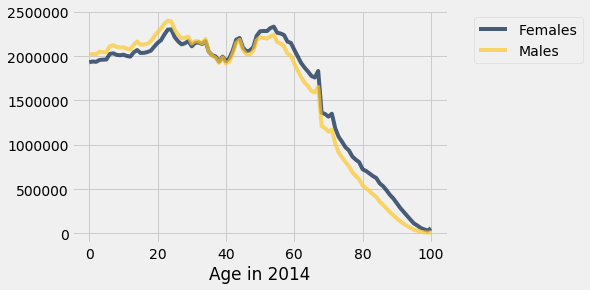

In [28]:
Table().with_columns(
    'Age in 2014', females.column('AGE'),
    'Females', females.column('2014'),
    'Males', males.column('2014'),
).plot('Age in 2014')

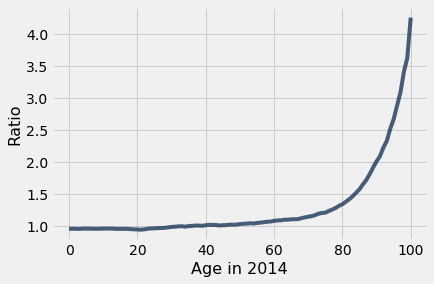

In [29]:
Table().with_columns(
    'Age in 2014', females.column('AGE'),
    'Ratio', females.column('2014') / males.column('2014'),
).plot('Age in 2014')

In [30]:
females.where('Change', are.above(350000)).sort('AGE').show()

SEX,AGE,2010,2014,Change,Growth
2,64,"1,414,220","1,826,662","412,442",6.61%
2,65,"1,405,839","1,776,761","370,922",6.03%
2,66,"1,381,541","1,758,649","377,108",6.22%
2,67,"1,423,561","1,832,245","408,684",6.51%


In [31]:
females.where('AGE', are.between(55, 70)).show()

SEX,AGE,2010,2014,Change,Growth
2,55,"2,183,762","2,263,367","79,605",0.90%
2,56,"2,108,681","2,254,749","146,068",1.69%
2,57,"2,036,520","2,237,030","200,510",2.38%
2,58,"1,963,764","2,163,798","200,034",2.45%
2,59,"1,914,772","2,148,517","233,745",2.92%
2,60,"1,874,501","2,071,358","196,857",2.53%
2,61,"1,828,708","1,997,348","168,640",2.23%
2,62,"1,815,999","1,922,318","106,319",1.43%
2,63,"1,898,260","1,870,552","-27,708",-0.37%
2,64,"1,414,220","1,826,662","412,442",6.61%


In [32]:
2014 - make_array(67, 66, 65, 64)

array([1947, 1948, 1949, 1950])